In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importando dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/modulo11/semana5/temporal_dataset.csv')
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


## Nome das colunas do dataset




Date/Time: Representa a data e hora da observação meteorológica.

Temp_C: Temperatura do ar em graus Celsius.

Dew Point Temp_C: Temperatura do ponto de orvalho em graus Celsius, indicando o ponto em que a umidade no ar começaria a condensar.

Rel Hum_%: Umidade relativa do ar, expressa em porcentagem (%).

Wind Speed_km/h: Velocidade do vento em quilômetros por hora (km/h).

Visibility_km: Visibilidade medida em quilômetros (km), indicando o quão longe é possível ver claramente.

Press_kPa: Pressão atmosférica medida em kilopascal (kPa).

Weather: Condições climáticas observadas (ex: neblina, chuva, etc.).


In [ ]:
print(df.columns)

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')


## Métrica escolhida - Mean Squared Error (MSE)

- **MSE (Mean Squared Error):** Mede a média dos quadrados dos erros entre o valor real e o valor previsto. Essa métrica é adequada porque estamos lidando com um problema de predição contínua, onde queremos minimizar a diferença entre o valor real e o previsto.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Gerando dados de exemplo (séries temporais)
# Vamos usar uma função seno para simular uma série temporal
timesteps = np.linspace(0, 100, 500)
data = np.sin(timesteps)

# Pré-processamento: Normalizando os dados
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1))

# Preparando os dados para a RNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(data, seq_length)

# Dividindo em dados de treino e teste
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Construindo o modelo RNN
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Fazendo previsões
y_pred = model.predict(X_test)

# Revertendo a normalização para os valores originais
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = scaler.inverse_transform(y_pred)

# Métrica de erro (MSE no conjunto de teste)
mse_test = np.mean((y_test_rescaled - y_pred_rescaled) ** 2)
print(f"Mean Squared Error no conjunto de teste: {mse_test:.4f}")



Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.3436 - val_loss: 0.0165
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101 - val_loss: 0.0011
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.0725e-04 - val_loss: 1.1871e-04
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.2037e-05 - val_loss: 1.8954e-05
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.7236e-06 - val_loss: 2.3357e-06
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3889e-06 - val_loss: 9.7670e-07
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.5182e-07 - val_loss: 4.9072e-07
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.9797e-07 - val_loss: 4.4498e-07
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9613e-07 - val_loss: 5.0776e-07
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7100e-07 - val_loss: 4.0203e-07
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.6203e-07 - val_loss: 3.3807e-07
Epoch 12/20


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Mean Squared Error no conjunto de teste: 0.0000


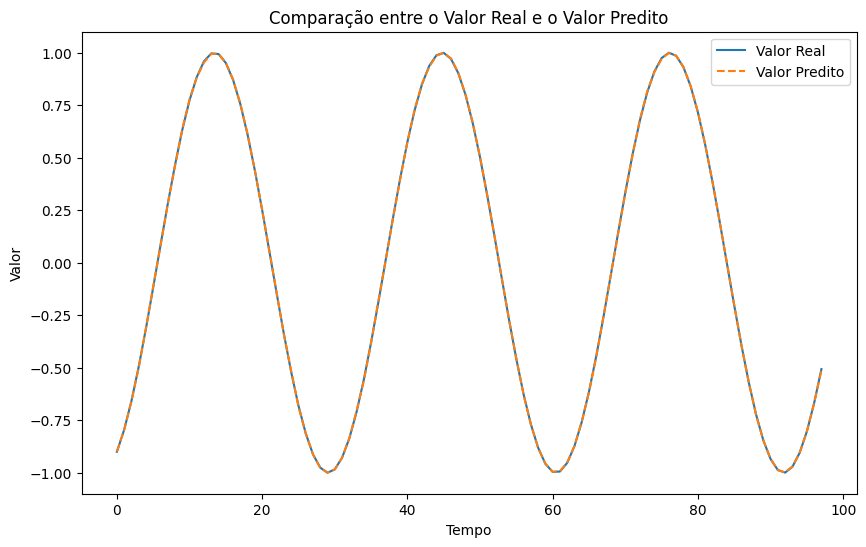

In [11]:
# Plotando os valores reais vs valores preditos
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Valor Real')
plt.plot(y_pred_rescaled, label='Valor Predito', linestyle='dashed')
plt.title('Comparação entre o Valor Real e o Valor Predito')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Gerando dados de exemplo (séries temporais)
timesteps = np.linspace(0, 100, 500)
data = np.sin(timesteps)

# Pré-processamento: Normalizando os dados
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1))

# Preparando os dados para a RNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(data, seq_length)

# Dividindo em dados de treino e teste
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Construindo o modelo RNN
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Fazendo previsões passo a passo
predictions = []
for i in range(len(X_test)):
    current_input = X_test[i:i+1]  # Pega o dado de teste atual
    prediction = model.predict(current_input)  # Faz a predição
    predictions.append(prediction[0])  # Armazena a predição

# Revertendo a normalização para os valores originais
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
predictions_rescaled = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Criando um DataFrame com os valores reais e preditos para comparação
df_predictions = pd.DataFrame({
    'Valor Real': y_test_rescaled.flatten(),
    'Valor Predito': predictions_rescaled.flatten()
})

# Exibindo a tabela de valores reais e preditos
print(df_predictions.head())



Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0975 - val_loss: 0.0056
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036 - val_loss: 1.1569e-04
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.0092e-05 - val_loss: 1.8155e-05
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3890e-05 - val_loss: 7.8974e-06
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.9734e-06 - val_loss: 5.6063e-06
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1234e-06 - val_loss: 3.7858e-06
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0809e-06 - val_loss: 4.0274e-06
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6054e-06 - val_loss: 2.3926e-06
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9802e-06 - val_loss: 2.5183e-06
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2338e-06 - val_loss: 1.6295e-06
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7338e-06 - val_loss: 1.4050e-06
Epoch 12